# NorKorr Letter Networks

Case Camilla Collett. Network data is taken from the manuscript catalogue at the National Libary of Norway. The following steps were taken:

* Go to HANSKE search at [https://www.nb.no/hanske/](https://www.nb.no/hanske/)
* Navigate to search for shelf mark at [https://www.nb.no/hanske/signaturskjema.php](https://www.nb.no/hanske/signaturskjema.php)
* Check the signature series is set on "Brevs." and type "3" in the field named "Hovednummer"
* Click the "Send" button (this might take some time)
* Copy and Paste the list results into a Google spreadsheet
* Import the spreadsheet into OpenRefine
* Do data cleaning (basically, devide the strings of text into individual colums for sender/source and receiver/target and a couple of additional colums for date and URN (where applicable)
* For drawing network graphs it's easiest with a table containing only colums with names, thus creating an edges-list
* Export OpenRefine spreadsheet as .csv
* Store .csv file in the NorKorr repository
* For the purpose of this network analysis I created the file "collett_network.csv" and stored it in the /data folder

## Preparing Python
In order to run this program, you must first install python and import a couple of python libraries, namely:

In [15]:
import csv # a library that handles .csv files
import networkx as nx # a library for complex network analysis
from operator import itemgetter
import community # for this to work you must install the python-louvain v0.5

We now have Python read our data in the .csv file.

In [16]:
with open('collett_network.csv', 'r') as edgecsv: # open file
    edgereader = csv.reader(edgecsv) # read csc
    edges = [tuple(e) for e in edgereader][1:] # retrieve data from csv

Let's check if it was successful!

In [17]:
print(len(edges)) # this countes the total number of edges

235


Now let's initialize a graph.

In [18]:
G = nx.Graph() # --- oops! This should be a directed network! Use DiGraph instead of Graph
# G = nx.DiGraph()

In [19]:
G.add_edges_from(edges)

In [20]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 24
Average degree:   2.0870


In [21]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.09486166007905138


None


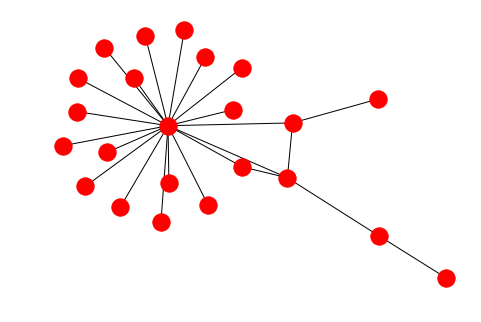

In [22]:
print(nx.draw(G))